# Introduction
The goal of this project is to analyze the Electric Vehicle Population Data dataset and predict the Base MSRP of electric vehicles based on their characteristics. The dataset contains information on various electric vehicle models, including their range, battery capacity, and price.

## Problem Statement
The goal of this project is to develop a predictive model that can accurately forecast the Base MSRP of electric vehicles based on their characteristics. This model can be used by EV manufacturers, policymakers, and industry analysts to better understand the factors that influence EV pricing and to make informed decisions.
* Project Type : Supervised Learning - Regression
* Target Variable: Base MSRP

# Data Preprocessing

## Importing necessary libraries

In [320]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR  
from sklearn.neural_network import MLPRegressor 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error  
from sklearn.model_selection import GridSearchCV 
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline 
import joblib

In [322]:
# to deactivate warnings
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [324]:
data = pd.read_csv("C:\\Users\\aniru\\Downloads\\Electric_Vehicle_Population_Data (4).csv")

In [326]:
df = pd.DataFrame(data)

In [232]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1C4JJXP66P,Kitsap,Poulsbo,WA,98370.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,23.0,258127145,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
1,1G1FX6S08K,Snohomish,Lake Stevens,WA,98258.0,2019,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,44.0,4735426,POINT (-122.06402 48.01497),PUGET SOUND ENERGY INC,5.306105e+10
2,WBY1Z2C58F,King,Seattle,WA,98116.0,2015,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81.0,0.0,34.0,272697666,POINT (-122.41067 47.57894),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1V24F,Yakima,Selah,WA,98942.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,0.0,15.0,258112970,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10


In [234]:
print("Shape of the dataset is: ")
df.shape

Shape of the dataset is: 


(223995, 17)

In [236]:
print("Columns: ")
df.columns

Columns: 


Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [238]:
print("Dataset Information:")
print("\t")
df.info()

Dataset Information:
	
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223995 entries, 0 to 223994
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         223995 non-null  object 
 1   County                                             223992 non-null  object 
 2   City                                               223992 non-null  object 
 3   State                                              223995 non-null  object 
 4   Postal Code                                        223992 non-null  float64
 5   Model Year                                         223995 non-null  int64  
 6   Make                                               223995 non-null  object 
 7   Model                                              223995 non-null  object 
 8   Electric Vehicle Type                              

In [240]:
print("Summary Statistics: ")
print("\t")
df.describe()

Summary Statistics: 
	


,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,223992.000000,223995.000000,223977.000000,223977.000000,223521.000000,2.239950e+05,2.239920e+05
mean,98176.491165,2021.264408,47.736187,829.894386,28.876361,2.329328e+08,5.297997e+10
std,2544.240509,2.989676,84.987140,7372.509049,14.911023,6.884329e+07,1.531491e+09
min,1731.000000,1999.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,2.008002e+08,5.303301e+10
50%,98126.000000,2022.000000,0.000000,0.000000,32.000000,2.482992e+08,5.303303e+10
75%,98374.000000,2023.000000,39.000000,0.000000,42.000000,2.673973e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


In [242]:
print("Unique Values: ")
print("\t")
df.nunique()

Unique Values: 
	


VIN (1-10)                                            13175
County                                                  207
City                                                    789
State                                                    48
Postal Code                                             954
Model Year                                               21
Make                                                     46
Model                                                   164
Electric Vehicle Type                                     2
Clean Alternative Fuel Vehicle (CAFV) Eligibility         3
Electric Range                                          109
Base MSRP                                                31
Legislative District                                     49
DOL Vehicle ID                                       223995
Vehicle Location                                        952
Electric Utility                                         76
2020 Census Tract                       

## Finding missing values

In [328]:
missing_values = df.isnull().sum()
print("Missing Values:")
print("\t")
print(missing_values)

Missing Values:
	
VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        18
Base MSRP                                             18
Legislative District                                 474
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64


## Handling missing values
* Fill the missing values with mean(For numerical columns)

In [330]:
df['Electric Range'].fillna(df['Electric Range'].mean(), inplace=True)
df['Base MSRP'].fillna(df['Base MSRP'].mean(), inplace=True)
df['Postal Code'].fillna(df['Postal Code'].mean(), inplace=True)
df['2020 Census Tract'].fillna(df['2020 Census Tract'].mean(), inplace=True)

* Fill the missing values with mode(For categorical columns )

In [332]:
df['County'].fillna(df['County'].mode()[0], inplace=True)
df['City'].fillna(df['City'].mode()[0], inplace=True)
df['State'].fillna(df['State'].mode()[0], inplace=True)
df['Vehicle Location'].fillna(df['Vehicle Location'].mode()[0], inplace=True)
df['Electric Utility'].fillna(df['Electric Utility'].mode()[0], inplace=True)
df['Legislative District'].fillna(df['Legislative District'].mode()[0], inplace=True)

In [334]:
# Checking for the null values after imputation
missing_values = df.isnull().sum()
print("Missing Values after Imputation:")
print(missing_values)

Missing Values after Imputation:
VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


### Checking for duplicates

In [336]:
print("\t")
print(f"Total number of duplicate values is : {df.duplicated().sum()}")

	
Total number of duplicate values is : 0


## Visualizing Outliers

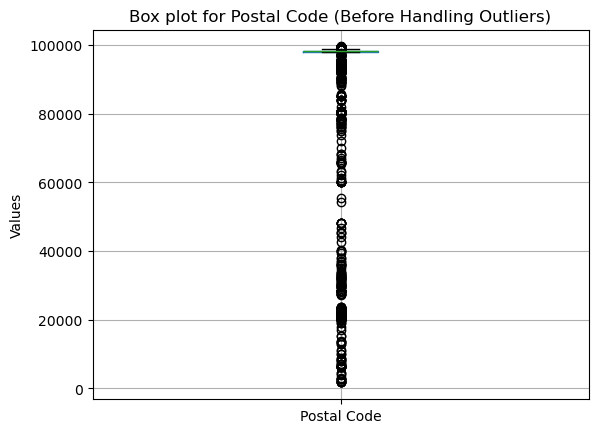

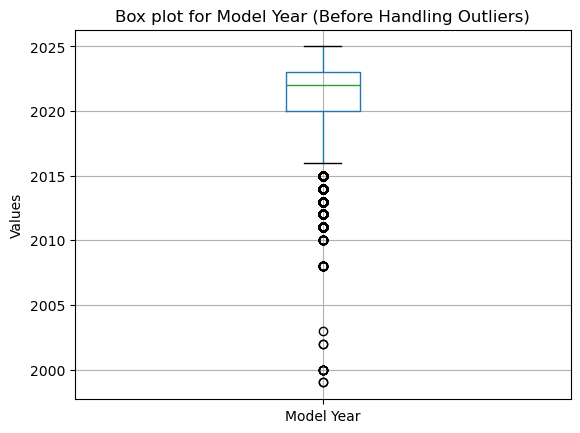

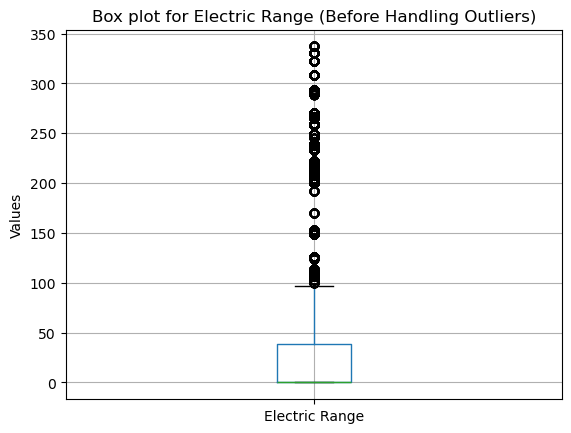

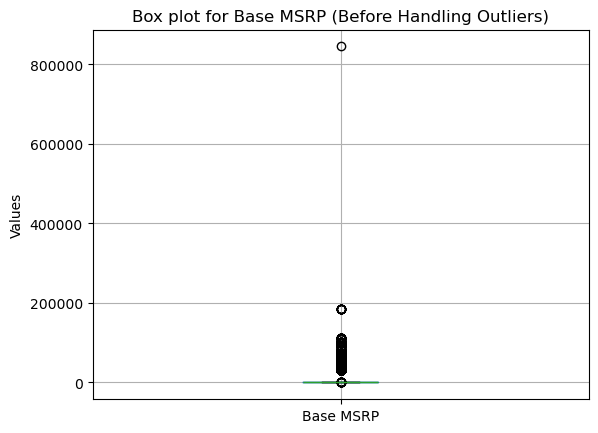

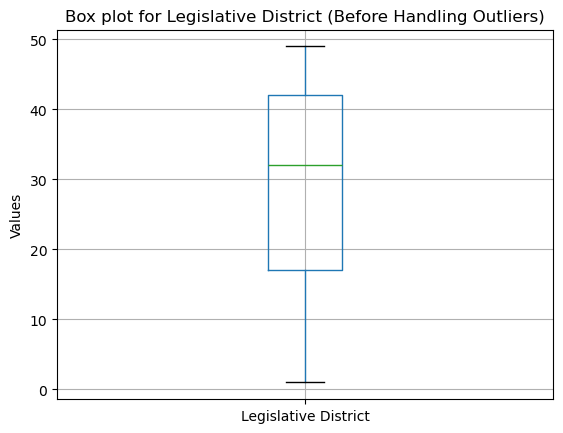

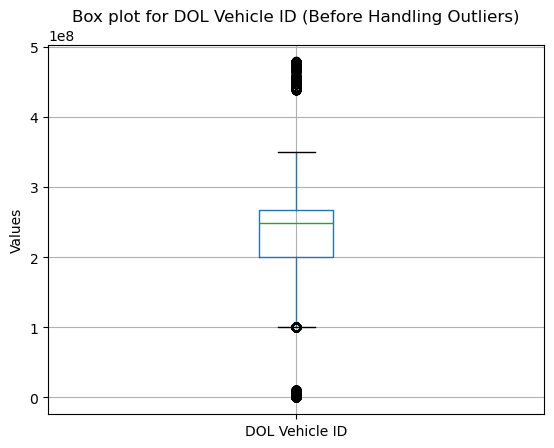

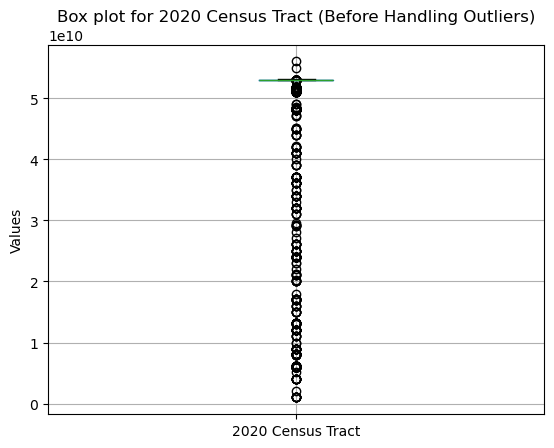

In [338]:
#Visualize outliers before handling 
numeric_columns = df.select_dtypes(include=['number'])
for column in numeric_columns.columns:
    plt.figure()
    numeric_columns.boxplot(column=column)
    plt.title(f"Box plot for {column} (Before Handling Outliers)")
    plt.ylabel("Values")
    plt.show()

## Handling Outliers

In [340]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]
    print(f'Outliers removed in {col}')

Outliers removed in Postal Code
Outliers removed in Model Year
Outliers removed in Electric Range
Outliers removed in Base MSRP
Outliers removed in Legislative District
Outliers removed in DOL Vehicle ID
Outliers removed in 2020 Census Tract


In [342]:
# Calculate skewness of numerical columns
numerical_cols = df.select_dtypes(include=['int64','float64']).columns
skewness = df[numerical_cols].skew()
print(skewness)

Postal Code             1.163221
Model Year             -1.849461
Electric Range          1.924624
Base MSRP               0.000000
Legislative District   -0.553270
DOL Vehicle ID         -1.021972
2020 Census Tract       0.348516
dtype: float64


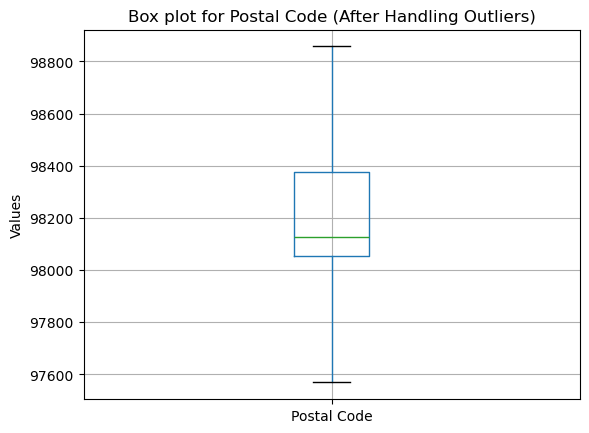

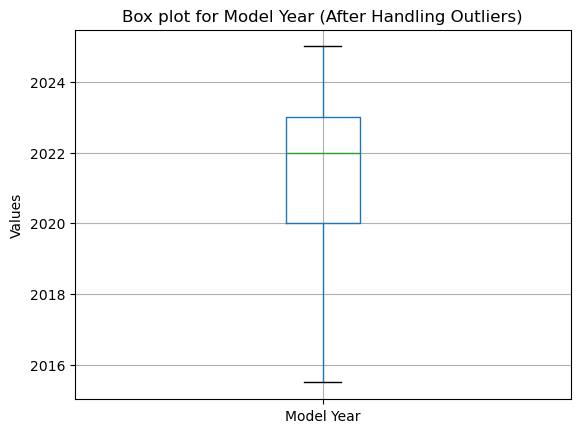

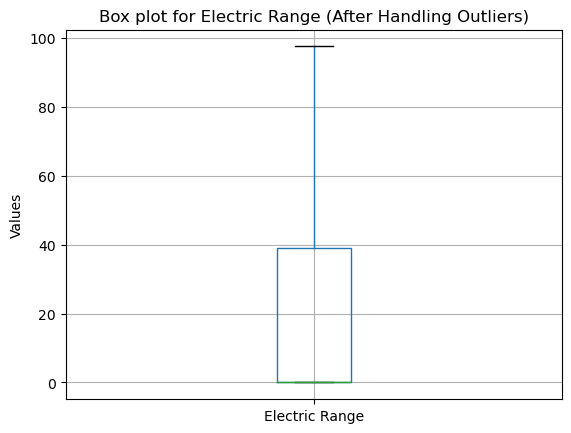

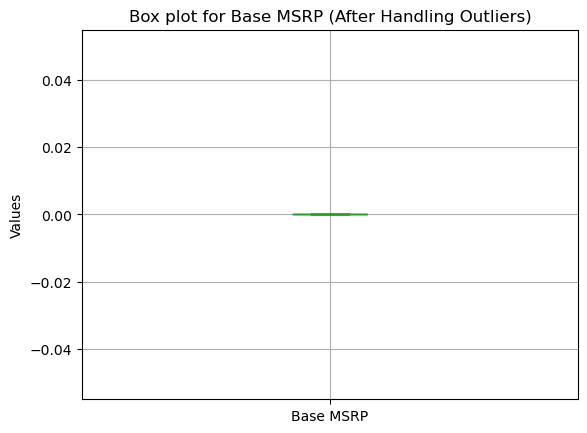

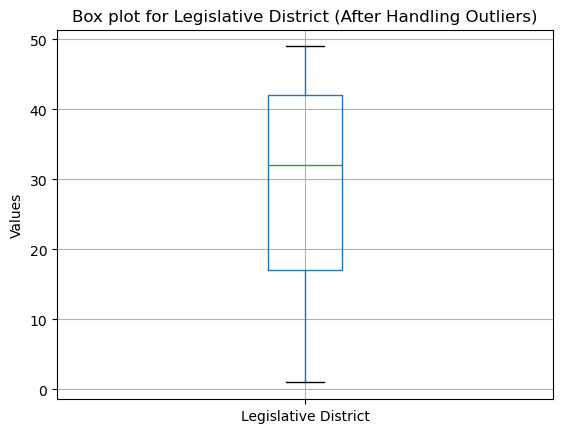

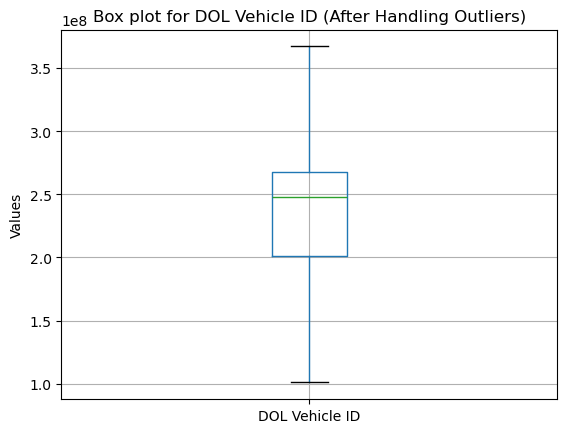

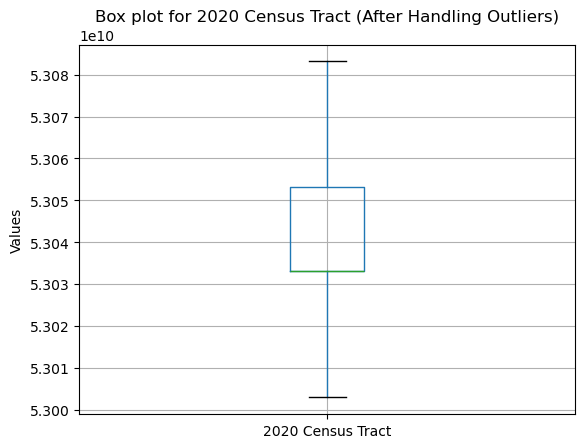

In [344]:
#Visualize outliers after handling 
numeric_columns = df1.select_dtypes(include=['float64', 'int64'])
for column in numeric_columns.columns:
    plt.figure()
    numeric_columns.boxplot(column=column)
    plt.title(f"Box plot for {column} (After Handling Outliers)")
    plt.ylabel("Values")
    plt.show()

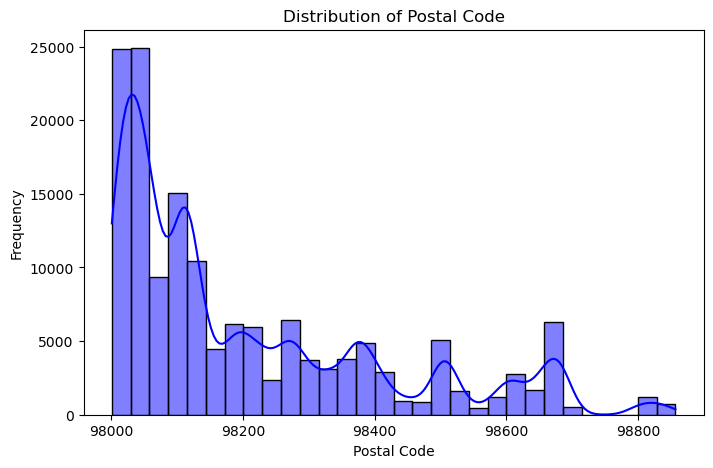

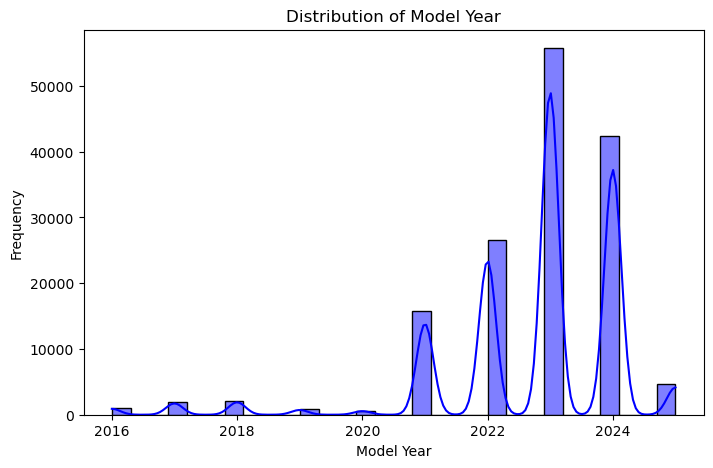

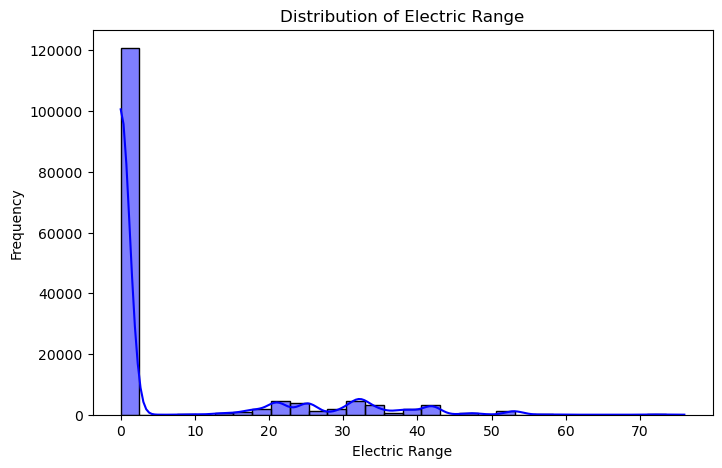

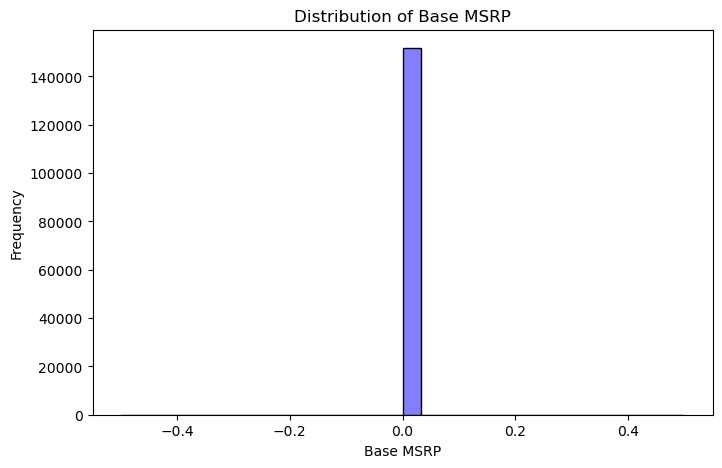

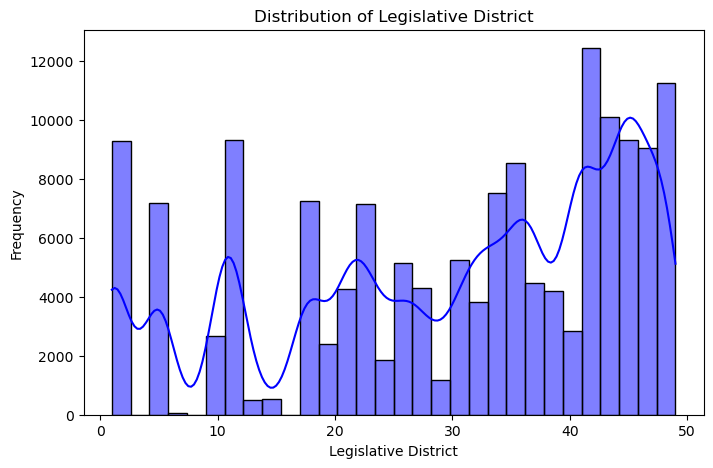

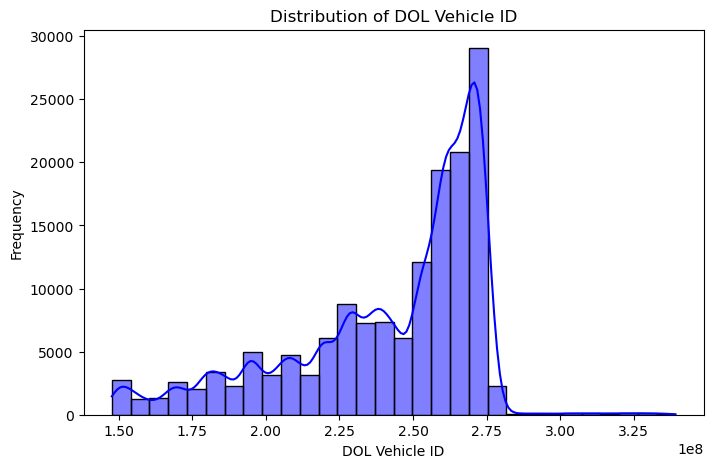

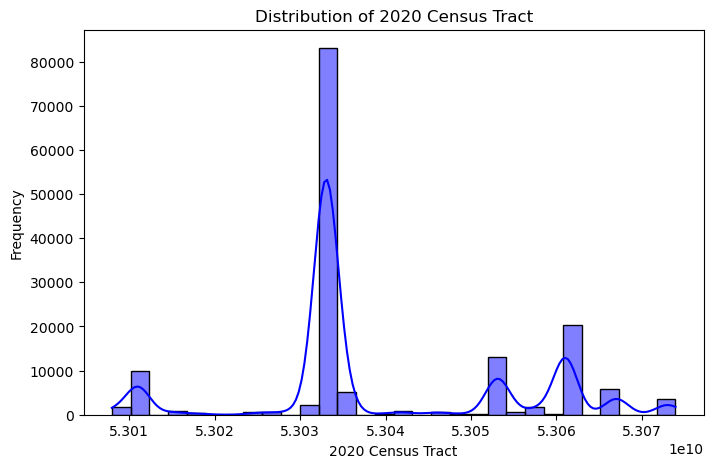

In [346]:
#Plot distribution for numeric columns 
for column in numeric_columns.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

## Encoding Categorical Data

In [348]:
from sklearn.preprocessing import LabelEncoder

In [350]:
# Converting categorical variables into numerical variables 
categorical_cols = ['VIN (1-10)','County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 
                     'Vehicle Location', 'Electric Utility']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

## Feature selection

In [150]:
numeric_data = df.select_dtypes(include=['float64','int64'])

In [152]:
correlation_matrix = numeric_data.corr()
correlation_matrix

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
Postal Code,1.000000,0.001475,-0.000898,-0.002015,-0.080381,0.005512,0.531567
Model Year,0.001475,1.000000,-0.523994,-0.229246,-0.015064,0.247700,0.006308
Electric Range,-0.000898,-0.523994,1.000000,0.115634,0.017314,-0.151610,-0.000948
Base MSRP,-0.002015,-0.229246,0.115634,1.000000,0.011199,-0.044597,-0.000278
Legislative District,-0.080381,-0.015064,0.017314,0.011199,1.000000,-0.009278,-0.032927
DOL Vehicle ID,0.005512,0.247700,-0.151610,-0.044597,-0.009278,1.000000,0.003833
2020 Census Tract,0.531567,0.006308,-0.000948,-0.000278,-0.032927,0.003833,1.000000


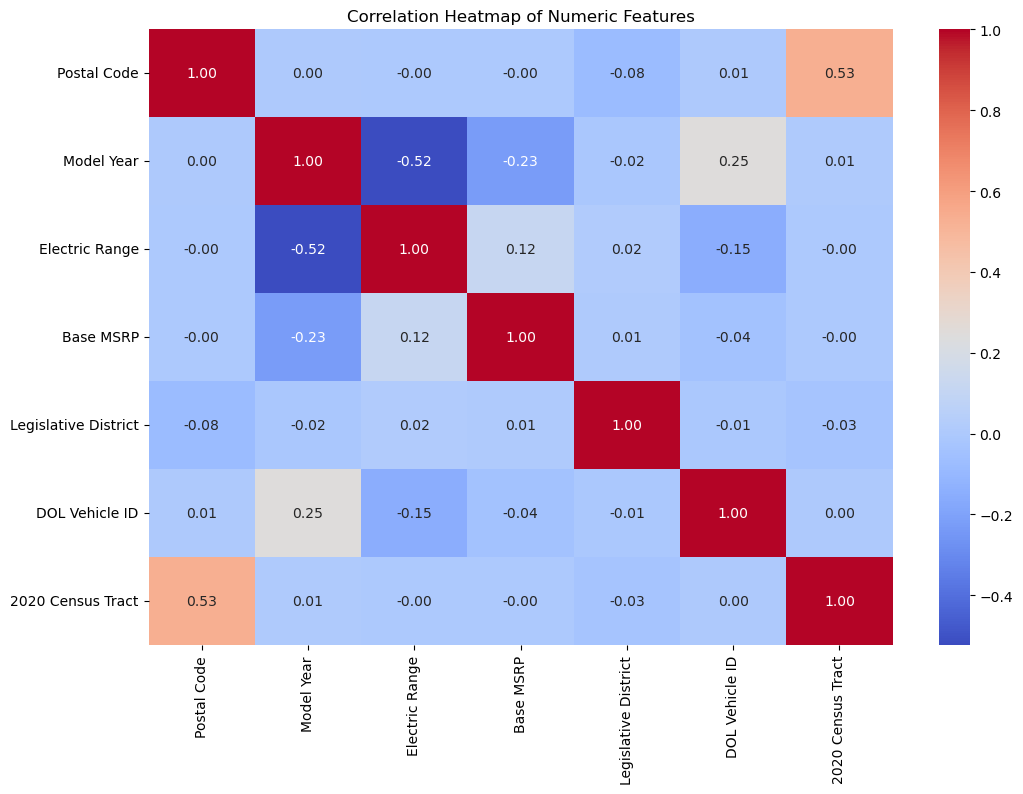

In [154]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

- The heatmap shows a clear pattern of high correlation between some features, such as:
    - Base MSRP and Electric Range
    - Model Year and Base MSRP
- Some features have low correlation with others, such as:
    - Postal Code and most other features
- There are some clusters of highly correlated features, such as:
    - Base MSRP, Electric Range, and Model Year


In [156]:
# Define X and y
X = df.drop('Base MSRP', axis=1)
y = df['Base MSRP']

In [158]:
k = 15 
selector = SelectKBest(score_func=f_regression, k=k)  
X_selected = selector.fit_transform(X,y) 

In [160]:
# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Legislative District', 'DOL Vehicle ID', 'Vehicle Location',
       'Electric Utility'],
      dtype='object')


## Splitting the data into training and testing sets

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

## Feature Scaling

In [165]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

In [167]:
# Check the shape of the sets
print("X_train shape:", X_train_scaled.shape)
print("X_test shape:", X_test_scaled.shape)

X_train shape: (179196, 15)
X_test shape: (44799, 15)
